# Introduction to Neural Networks

In [ ]:
%pip install ISLP


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.6/774.6 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 31.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 41.4 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=814caa5f55177eea625e5f50dd8c3c482d6d8ad95332e2fe8624121d04340865
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader


In [2]:
# Load MNIST data
import sklearn.datasets
mnist = sklearn.datasets.fetch_openml('mnist_784', data_home="mnist_784")

/Users/belen/anaconda3/envs/TongP/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
X = torch.tensor(mnist["data"].values, dtype=torch.float32).reshape([-1, 28* 28])
Y = torch.tensor(np.array(mnist["target"].values).astype(np.float32), dtype=torch.float32)
print(X.shape, Y.shape)

T = torch.nn.functional.one_hot(torch.tensor(Y, dtype=torch.int64), num_classes=10)
T = torch.tensor(T, dtype=torch.float32)


torch.Size([70000, 784]) torch.Size([70000])


/var/folders/vl/yt67rw7s1tl_87hvr6bgvvw00000gn/T/ipykernel_12344/305117269.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  T = torch.nn.functional.one_hot(torch.tensor(Y, dtype=torch.int64), num_classes=10)
/var/folders/vl/yt67rw7s1tl_87hvr6bgvvw00000gn/T/ipykernel_12344/305117269.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  T = torch.tensor(T, dtype=torch.float32)


In [5]:
x_train = torch.tensor(X[:60000, :]/255, dtype = torch.float32)
y_train = torch.tensor(Y[:60000], dtype = torch.float32)
t_train = torch.tensor(T[:60000], dtype = torch.float32)
n=60000
x_test = torch.tensor(X[60000:, :]/255, dtype = torch.float32)
y_test = torch.tensor(Y[60000:], dtype = torch.float32)
t_test = torch.tensor(T[60000:], dtype = torch.float32)

/var/folders/vl/yt67rw7s1tl_87hvr6bgvvw00000gn/T/ipykernel_12344/1140395519.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train = torch.tensor(X[:60000, :]/255, dtype = torch.float32)
/var/folders/vl/yt67rw7s1tl_87hvr6bgvvw00000gn/T/ipykernel_12344/1140395519.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(Y[:60000], dtype = torch.float32)
/var/folders/vl/yt67rw7s1tl_87hvr6bgvvw00000gn/T/ipykernel_12344/1140395519.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t_train = torch.tensor(T[:60000], dtype

In [6]:
traindata = TensorDataset(x_train, t_train)
trainloader=DataLoader(dataset = traindata, batch_size=32, shuffle=True)
testdata = TensorDataset(x_test, t_test)
testloader=DataLoader(dataset = testdata, batch_size=32, shuffle=True)

# 0. Review: Multinomial logistic regression with MNIST data.

In [7]:
len(trainloader.dataset)

60000

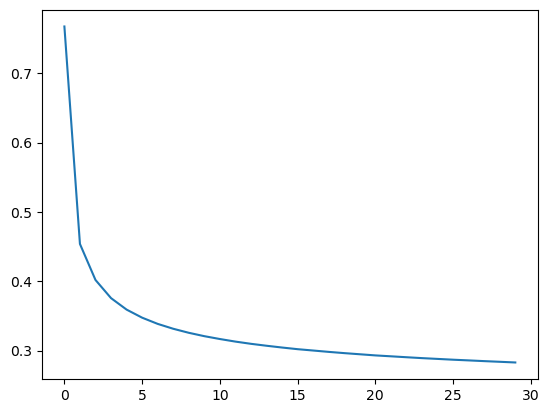

In [8]:
z_model = torch.nn.Linear(784, 10, bias=True) #X:[n, 784] #name changed

#z_model(X) = X@W+b,    W:[784, 10],    b = [10]
loss_fn = torch.nn.CrossEntropyLoss(reduction='mean')# This is the only change
# loss_fn(Z, T): -loglike(Multinomial(Q, T))

optimizer = torch.optim.SGD(z_model.parameters(), lr=0.01)
history=[]
epochs = 30
n=len(trainloader.dataset)

for epoch in range(epochs):
  epoch_loss = 0.0
  for xx, tt in trainloader:
    zhat = z_model(xx) #xx@W+b
    loss = loss_fn(zhat, tt) #cross-entropy loss = - log-lik(Multi(q, tt))
    loss.backward()
    epoch_loss += loss.item()*len(xx)
    optimizer.step()
    optimizer.zero_grad()
  history.append(epoch_loss/n)
plt.plot(history)

In [9]:
zhat_test = z_model(x_test) #x_test: [n_test, 784]
Q_test = torch.softmax(zhat_test, axis=1) # Q_test: [n_test, 10]
#y_test
y_hat = torch.argmax(Q_test, axis=1).to(torch.float32) #y_hat: [n_test,]

torch.mean((y_hat == y_test.reshape([-1])).to(torch.float32))

tensor(0.9205)

## 1. Create the neural networks using `torch.nn.Sequential`.

A sequential container. Modules will be added to it in the order they are passed in the constructor. Alternatively, an OrderedDict of modules can be passed in. The forward() method of Sequential accepts any input and forwards it to the first module it contains. It then “chains” outputs to inputs sequentially for each subsequent module, finally returning the output of the last module.

In [10]:
DN = torch.nn.Sequential(
    torch.nn.Linear(784, 64, bias=True),
    torch.nn.ReLU(),#A[1]
    torch.nn.Linear(64, 32, bias=True),
    torch.nn.ReLU(),#A[2]
    torch.nn.Linear(32, 10, bias=True),
)
# DN(X), #X:[n, 784], output: [n,10]
# z_model = torch.nn.Linear(784, 10, bias=True)
# z_model(X) #X:[n, 784] , output: [n,10]

loss_ftn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(DN.parameters(), lr=0.01)
history = []

In [11]:
epochs=10
history=[]

for epoch in range(epochs):
  running_loss =0
  for xx, yy in trainloader:
    optimizer.zero_grad()
    yhat = DN(xx)
    loss = loss_ftn(yhat, yy)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()*len(xx)
  history.append(running_loss/len(trainloader.dataset))

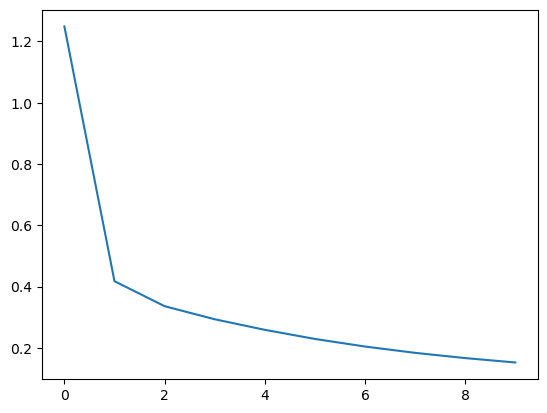

In [12]:
plt.plot(history)

In [13]:
y_pred = DN(x_test)
y_hat = torch.argmax(y_pred, axis=1)

In [14]:
torch.mean((y_test == y_hat).to(torch.float32))

tensor(0.9548)

In [15]:
DN.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0108, -0.0252, -0.0204,  ..., -0.0326, -0.0108,  0.0128],
                      [ 0.0054,  0.0319, -0.0044,  ...,  0.0276, -0.0032,  0.0093],
                      [-0.0116, -0.0065,  0.0011,  ...,  0.0212, -0.0194, -0.0295],
                      ...,
                      [ 0.0105, -0.0112, -0.0280,  ..., -0.0216, -0.0017,  0.0145],
                      [-0.0304,  0.0056,  0.0167,  ..., -0.0128,  0.0013,  0.0021],
                      [ 0.0333,  0.0040,  0.0005,  ..., -0.0085, -0.0041,  0.0243]])),
             ('0.bias',
              tensor([ 0.1156,  0.0965,  0.1580,  0.0316, -0.0422,  0.0285,  0.0653,  0.0353,
                      -0.0026,  0.0724,  0.0314,  0.1382, -0.0665, -0.0566,  0.0246, -0.0562,
                       0.0389, -0.0010, -0.0678, -0.0535,  0.0591,  0.0531, -0.0519, -0.0479,
                       0.0231,  0.0327,  0.0524, -0.0838, -0.0166,  0.0273,  0.1327, -0.0369,
                       0.0279,  0.0497, 

In [16]:
for name in DN.state_dict():
  print(name)

0.weight
0.bias
2.weight
2.bias
4.weight
4.bias


In [17]:
DN[0].bias.shape

torch.Size([64])

In [18]:
torch.nn.functional.relu_(torch.tensor(3.0))

tensor(3.)

# 2. Custom Layer

We replace the following neural networks with custom layer:

```
DN = torch.nn.Sequential(
    torch.nn.Linear(784, 64, bias=True),
    torch.nn.ReLU(),#A[1]
    torch.nn.Linear(64, 32, bias=True),
    torch.nn.ReLU(),#A[2]
    torch.nn.Linear(32, 10, bias=True),
)
```

In [ ]:
class my_dn(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate four parameters and assign them as
        member parameters.
        """
        super().__init__()
        self.weight1 = torch.nn.Parameter(torch.randn(([784, 64])))
        # torch.tensor(torch.randn(([784, 64])), requires_grad=True)
        self.bias1 = torch.nn.Parameter(torch.randn(([64,])))
        self.weight2 = torch.nn.Parameter(torch.randn(([64, 32])))
        self.bias2 = torch.nn.Parameter(torch.randn(([32,])))
        self.weight3 = torch.nn.Parameter(torch.randn(([32, 10])))
        self.bias3 = torch.nn.Parameter(torch.randn(([10,])))

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        x = x@self.weight1 + self.bias1
        x = torch.nn.functional.relu_(x)
        x = x@self.weight2 + self.bias2
        x = torch.nn.functional.relu_(x)
        x= x@self.weight3 + self.bias3
        return x

In [ ]:
model = my_dn()
loss_ftn = torch.nn.CrossEntropyLoss()
history = []

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)
epochs=40
history=[]

for epoch in range(epochs):
  running_loss =0
  for xx, tt in trainloader:
    optimizer.zero_grad()
    zhat = model(xx)
    loss = loss_ftn(zhat, tt)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()*len(xx)
  print(epoch, running_loss/len(trainloader.dataset))
  history.append(running_loss/len(trainloader.dataset))

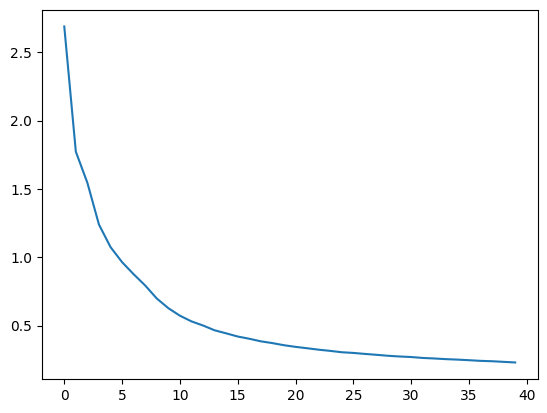

In [ ]:
plt.plot(history)

In [ ]:
zhat_test = model(x_test) #x_test: [n_test, 784]
Q_test = torch.softmax(zhat_test, axis=1) # Q_test: [n_test, 10]
#y_test
y_hat = torch.argmax(Q_test, axis=1).to(torch.float32) #y_hat: [n_test,]

torch.mean((y_hat == y_test.reshape([-1])).to(torch.float32))

tensor(0.9313)

### 3.1 Using predefined layer in the customed module

In [ ]:
class my_dn2(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = torch.nn.Linear(784, 64)
        self.relu1 = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(64, 32)
        self.linear3 = torch.nn.Linear(32, 10)
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu1(x)
        x = self.linear2(x)
        x = self.relu1(x)
        x = self.linear3(x)
        return x

In [ ]:
DN2 = my_dn2()
loss_ftn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(DN2.parameters(), lr=0.01)
history = []

In [ ]:
epochs=20
history=[]

for epoch in range(epochs):
  running_loss =0
  for xx, tt in trainloader:
    optimizer.zero_grad()
    zhat = DN2(xx)
    loss = loss_ftn(zhat, tt)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()*len(xx)
  print(epoch, running_loss/len(trainloader.dataset))
  history.append(running_loss/len(trainloader.dataset))

0 1.1601285572052003
1 0.391120159359773
2 0.3179823364933332
3 0.2804890096227328
4 0.252340426303943
5 0.2274276661624511
6 0.20607046258350215
7 0.1884268610040347
8 0.17374648071924845
9 0.1606384184067448
10 0.14966689802855254
11 0.13990953838378192
12 0.1316429988178114
13 0.12379932096948226
14 0.11686810810640454
15 0.11100778918390472
16 0.10526516669392585
17 0.10017663085286815
18 0.09569220531483491
19 0.09095184114178022


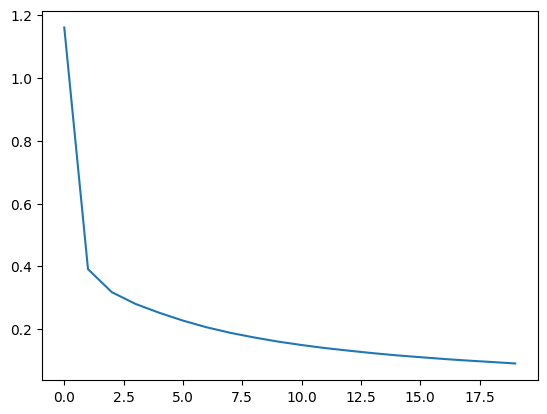

In [ ]:
plt.plot(history)

In [ ]:
zhat_test = DN2(x_test) #x_test: [n_test, 784]
Q_test = torch.softmax(zhat_test, axis=1) # Q_test: [n_test, 10]
#y_test
y_hat = torch.argmax(Q_test, axis=1).to(torch.float32) #y_hat: [n_test,]

torch.mean((y_hat == y_test.reshape([-1])).to(torch.float32))

tensor(0.9677)

## 2. Combining two layers.

In [ ]:
DN1 = torch.nn.Sequential(
    torch.nn.Linear(784, 64),
    torch.nn.ReLU(),
)

DN2 = torch.nn.Sequential(
    torch.nn.Linear(64, 32),
    torch.nn.ReLU(),
    torch.nn.Linear(32, 10), )

# DN2(DN1(X))

loss_ftn = torch.nn.CrossEntropyLoss()
all_params = list(DN1.parameters())+list(DN2.parameters())
optimizer = torch.optim.SGD(all_params, lr=0.01) # You have option to have two optimizers.
history = []

In [ ]:
epochs=20
history=[]

for epoch in range(epochs):
  running_loss =0
  for xx, tt in trainloader:
    optimizer.zero_grad()
    zhat = DN2(DN1(xx))
    loss = loss_ftn(zhat, tt)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()*len(xx)
  print(epoch, running_loss/len(trainloader.dataset))
  history.append(running_loss/len(trainloader.dataset))

0 1.2112340073744456
1 0.39462481980522474
2 0.3196181095004082
3 0.27793355433742206
4 0.24762855254411698
5 0.22229743012984593
6 0.2013526392529408
7 0.18434929173638423
8 0.17072749834259351
9 0.15872669340074064
10 0.148744562411805
11 0.13951153506189584
12 0.1314229557817181
13 0.12441530826389789
14 0.11756060871084531
15 0.11118177815228701
16 0.10582925387794773
17 0.1004238977993528
18 0.09570339303985238
19 0.0913080301133295


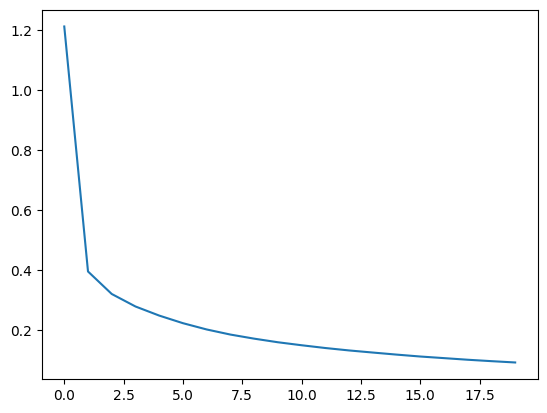

In [ ]:
plt.plot(history)

In [ ]:
zhat_test = DN2(DN1(x_test)) #x_test: [n_test, 784]
Q_test = torch.softmax(zhat_test, axis=1) # Q_test: [n_test, 10]
#y_test
y_hat = torch.argmax(Q_test, axis=1).to(torch.float32) #y_hat: [n_test,]

torch.mean((y_hat == y_test.reshape([-1])).to(torch.float32))

tensor(0.9674)

### Exercise 2.1: The above example can be optimized with two separate optimizers:

```
optimizer1 = torch.optim.SGD(DN1.parameters(), lr=0.01)
optimizer2 = torch.optim.SGD(DN2.parameters(), lr=0.01)
```
Train the model with two optimizers and calculate the accuracy.

In [ ]:
DN1 = torch.nn.Sequential(
    torch.nn.Linear(784, 64),
    torch.nn.ReLU(),
)

DN2 = torch.nn.Sequential(
    torch.nn.Linear(64, 32),
    torch.nn.ReLU(),
    torch.nn.Linear(32, 10), )

# DN2(DN1(X))

loss_ftn = torch.nn.CrossEntropyLoss()

optimizer1 = torch.optim.SGD(DN1.parameters(), lr=0.01)
optimizer2 = torch.optim.SGD(DN2.parameters(), lr=0.01)
history = []

In [ ]:
epochs=20
history=[]

for epoch in range(epochs):
  running_loss =0
  for xx, tt in trainloader:
    optimizer1.zero_grad()
    optimizer2.zero_grad()
    zhat = DN2(DN1(xx))
    loss = loss_ftn(zhat, tt)
    loss.backward()
    optimizer1.step()
    optimizer2.step()
    running_loss += loss.item()*len(xx)
  print(epoch, running_loss/len(trainloader.dataset))
  history.append(running_loss/len(trainloader.dataset))

0 1.2069908891916274
1 0.4061869699637095
2 0.33573836386203765
3 0.2958169570962588
4 0.26416039765973887
5 0.23712918001314004
6 0.21441932291388513
7 0.19501766999165218
8 0.17855560879657667
9 0.16550792706807455
10 0.15329959096610546
11 0.14333233961760997
12 0.13378568572600683
13 0.12565439413214724
14 0.11814270199860136
15 0.11133633464723826
16 0.10552134303301573
17 0.09965808110808333
18 0.09455144532769919
19 0.08988592983012399


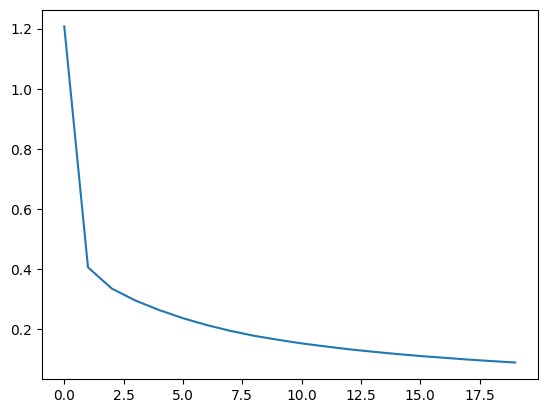

In [ ]:
plt.plot(history)

In [ ]:
zhat_test = DN2(DN1(x_test)) #x_test: [n_test, 784]
Q_test = torch.softmax(zhat_test, axis=1) # Q_test: [n_test, 10]
#y_test
y_hat = torch.argmax(Q_test, axis=1).to(torch.float32) #y_hat: [n_test,]

torch.mean((y_hat == y_test.reshape([-1])).to(torch.float32))

tensor(0.9666)

In [ ]:
for name, param in DN2.named_parameters():
  print(name)

linear1.weight
linear1.bias
linear2.weight
linear2.bias


# Exercises:

## Exercise 1:

You are given the following data:

In [19]:
import torch
import numpy as np
from ISLP import load_data
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader

In [20]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [21]:
X = torch.tensor(Boston[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat']].values, dtype=torch.float32)
X_mean = torch.mean(X, axis=0)
X_std = torch.std(X, axis=0)
X=(X-X_mean)/X_std

In [ ]:
Y=torch.tensor(Boston["medv"], dtype=torch.float32).reshape([-1,1])

In [ ]:
X.shape

torch.Size([506, 12])

In [ ]:
Y.shape

torch.Size([506, 1])

In [ ]:
train_data = TensorDataset(X, Y)
trainloader= DataLoader(dataset = train_data, batch_size=32, shuffle=True)

In [ ]:
print(Y.shape, X.shape)


torch.Size([506, 1]) torch.Size([506, 12])


In [ ]:
model = torch.nn.Linear(12, 1, bias=True)
def loss_ftn(yhat, y):
  temp = torch.mean((yhat-y)**2)
  return temp
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


In [ ]:
epochs=20
history=[]

for epoch in range(epochs):
  running_loss =0
  for xx, yy in trainloader:
    optimizer.zero_grad()
    yhat = model(xx)
    loss = loss_ftn(yhat, yy)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()*len(xx)
  history.append(running_loss/len(trainloader.dataset))

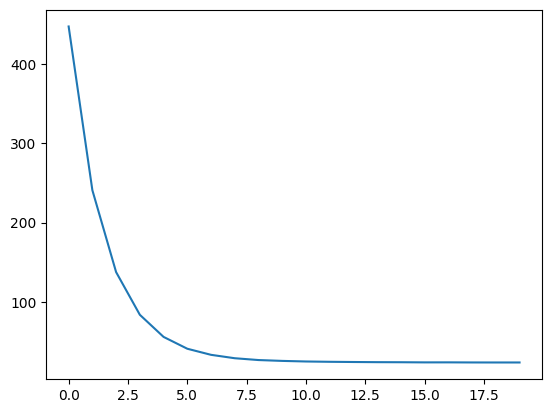

In [ ]:
plt.plot(history)

In [ ]:
Yhat=model(X)
torch.mean((Y-Yhat)**2)

tensor(23.0154, grad_fn=<MeanBackward0>)

### Develope a neural network to predict the house price, and calculate the train MSE. (Note that the train MSE of linear regression is approximately 23.)

In [ ]:
DN = torch.nn.Sequential(
    torch.nn.Linear(12, 5),
    torch.nn.ReLU(),
    torch.nn.Linear(5, 5),
    torch.nn.ReLU(),
    torch.nn.Linear(5, 1),
)

def loss_ftn(yhat, y):
  temp = torch.mean((yhat-y)**2)
  return temp
optimizer = torch.optim.SGD(DN.parameters(), lr=0.01)
history = []

In [ ]:
epochs=40
history=[]

for epoch in range(epochs):
  running_loss =0
  for xx, yy in trainloader:
    optimizer.zero_grad()
    yhat = DN(xx)
    loss = loss_ftn(yhat, yy)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()*len(xx)
  history.append(running_loss/len(trainloader.dataset))

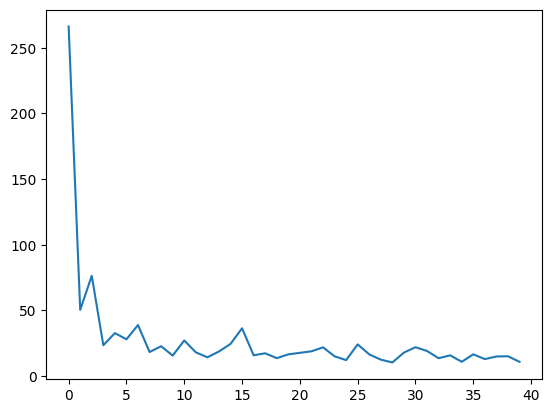

In [ ]:
plt.plot(history)

In [ ]:
Yhat=DN(X)
torch.mean((Y-Yhat)**2)

tensor(8.6909, grad_fn=<MeanBackward0>)

## Exercise 2: Pima Indian Diabetes



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("/content/drive/MyDrive/Class/Programming_2023_Pytorch/Chapter_7_Neural_Networks/Python/diabetes.csv", header=0, names=col_names)

In [ ]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [ ]:
X.shape

(768, 7)

In [ ]:
n=X.shape[0]
X = torch.tensor(X.values, dtype=torch.float32)
Y = torch.tensor(y.values, dtype=torch.float32).reshape([n,1])

In [ ]:
X_mean = torch.mean(X, axis=0)
X_std = torch.std(X, axis=0)

In [ ]:
XX = (X-X_mean)/X_std
dataset = TensorDataset(XX,Y)


In [ ]:
train_set, val_set = torch.utils.data.random_split(dataset, [500, n-500])
trainloader = DataLoader(dataset=train_set, batch_size=32, shuffle=True)
testloader =  DataLoader(dataset=val_set, batch_size=n-500, shuffle=True)






In [ ]:
DN = torch.nn.Sequential(
    torch.nn.Linear(7, 2, bias=True),
    torch.nn.ReLU(),
    torch.nn.Linear(2, 2, bias=True),
    torch.nn.ReLU(),
    torch.nn.Linear(2, 1, bias=True),
    torch.nn.Sigmoid(),
)
# Phat = DN(X) #X:[n, 7]  # sigmoid(X@W+b)
# Phat: [n,1]
def neg_log_lik(phat,y):
    out = -1 * torch.mean(y * torch.log(phat) + (1 - y) * torch.log(1 - phat))
    return out

optimizer = torch.optim.SGD(DN.parameters(), lr=0.1)
history = []

In [ ]:
epochs=1000
history=[]

for epoch in range(epochs):
  running_loss =0
  for xx, yy in trainloader:
    optimizer.zero_grad()
    phat = DN(xx)
    loss = neg_log_lik(phat, yy)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()*len(xx)
  history.append(running_loss/len(trainloader.dataset))

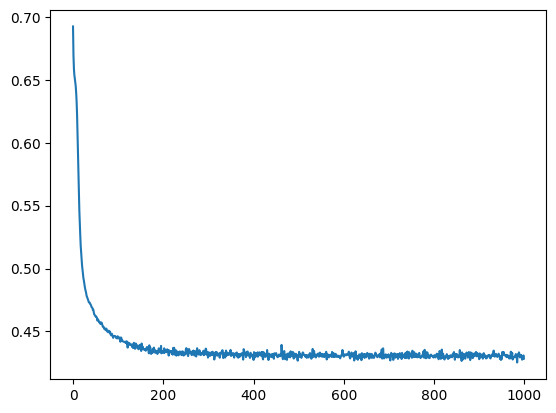

In [ ]:
plt.plot(history)

Caculate the accyracy:

In [ ]:
for xx, yy in testloader:
  phat = DN(xx)
  yhat = (phat>0.5)*1.0
  accuracy = torch.mean((yy == yhat)*1.0)
  print(accuracy)

tensor(0.7537)


Now, we compare it with linear model.

In [ ]:
model = torch.nn.Linear(7, 1, bias=True)

# Phat = DN(X) #X:[n, 7]  # sigmoid(X@W+b)
# Phat: [n,1]
def neg_log_lik(phat,y):
    out = -1 * torch.mean(y * torch.log(phat) + (1 - y) * torch.log(1 - phat))
    return out

optimizer = torch.optim.SGD(model.parameters(), lr=0.05)
history = []

In [ ]:
epochs=1000
history=[]

for epoch in range(epochs):
  running_loss =0
  for xx, yy in trainloader:
    optimizer.zero_grad()
    phat = torch.sigmoid(model(xx))
    loss = neg_log_lik(phat, yy)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()*len(xx)
  history.append(running_loss/len(trainloader.dataset))

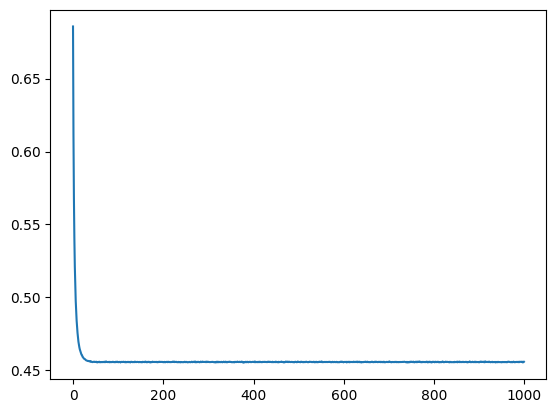

In [ ]:
plt.plot(history)

Caculate the accyracy:

In [ ]:
for xx, yy in testloader:
  phat = torch.sigmoid(model(xx))
  yhat = (phat>0.5)*1.0
  accuracy = torch.mean((yy == yhat)*1.0)
  print(accuracy)

tensor(0.7575)


# HW Problem 1: Iris data

We will be using the famous Iris dataset, which contains measurements of the sepal length, sepal width, petal length, and petal width for three species of iris flowers (Iris setosa, Iris versicolor, and Iris virginica). The goal is to predict the species of an iris flower based on these measurements.

In [126]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()

# Convert the data to PyTorch tensors
X = torch.tensor(iris.data, dtype=torch.float32)
y = torch.tensor(iris.target, dtype=torch.long)

t = torch.nn.functional.one_hot(torch.tensor(y, dtype=torch.int64), num_classes=3)
t = torch.tensor(t, dtype=torch.float32)


# Normalize the input data
mean = torch.mean(X, dim=0)
std = torch.std(X, dim=0)
X = (X - mean) / std

# Split the dataset into training and validation sets
X_train, X_val, t_train, t_val = train_test_split(X, t, test_size=0.2, random_state=42)

# Create PyTorch Datasets
train_dataset = TensorDataset(X_train, t_train)
val_dataset = TensorDataset(X_val, t_val)

# Define the data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


<ipython-input-126-d11aa3dd3743>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.nn.functional.one_hot(torch.tensor(y, dtype=torch.int64), num_classes=3)
<ipython-input-126-d11aa3dd3743>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(t, dtype=torch.float32)


Use `neural networks` and `multinomial logistic regression model` to classiy the iris, and calculate the test error. Try to provide the best `neural networks` with the smallest test error rate.

In [125]:
X.shape

torch.Size([150, 4])

## Exercise 2.3.3. Iris data (Offline)

We will be using the famous Iris dataset, which contains measurements of the sepal length, sepal width, petal length, and petal width for three species of iris flowers (Iris setosa, Iris versicolor, and Iris virginica). The goal is to predict the species of an iris flower based on these measurements.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()

# Convert the data to PyTorch tensors
X = torch.tensor(iris.data, dtype=torch.float32)
y = torch.tensor(iris.target, dtype=torch.long)

t = torch.nn.functional.one_hot(torch.tensor(y, dtype=torch.int64), num_classes=3)
t = torch.tensor(t, dtype=torch.float32)


# Normalize the input data
mean = torch.mean(X, dim=0)
std = torch.std(X, dim=0)
X = (X - mean) / std

# Split the dataset into training and validation sets
X_train, X_val, t_train, t_val = train_test_split(X, t, test_size=0.2, random_state=42)

# Create PyTorch Datasets
train_dataset = TensorDataset(X_train, t_train)
val_dataset = TensorDataset(X_val, t_val)

# Define the data loaders
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


<ipython-input-121-42939a159f2b>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.nn.functional.one_hot(torch.tensor(y, dtype=torch.int64), num_classes=3)
<ipython-input-121-42939a159f2b>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(t, dtype=torch.float32)


Use multinomial logistic regression model to classiy the iris, and calculate the test error.

## HW Problem 2: Fashion MNIST data

You are given the following fashion MNIST data. Use `the multinomial regression` and `neural networks` so that the model can determine the label from the images. Calculate the test accuracy. Compare your test accuracy with that of the `linear` version of the `multinomial regression`.

1. the picture

2. predicted label

3. real label

4. Explain the possible reason why your model is wrong in this case.

Hint: Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

In [ ]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
# transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = datasets.FashionMNIST('./data', download=True, train=True, transform=transform)
train_loader = DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
validationset = datasets.FashionMNIST('./data', download=True, train=False, transform=transform)
test_loader = DataLoader(validationset, batch_size=64, shuffle=True)

100%|██████████| 26421880/26421880 [00:00<00:00, 117457262.47it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 8144936.02it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw




100%|██████████| 4422102/4422102 [00:00<00:00, 61049527.53it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 16101623.41it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
xx, yy = trainset[0]

Ankle boot


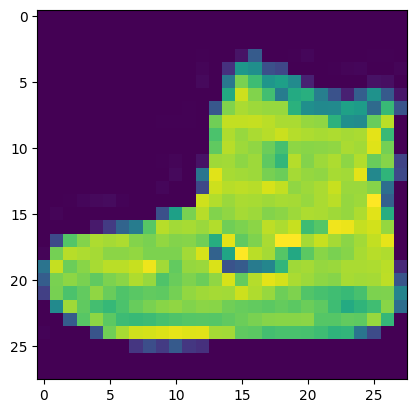

In [ ]:
plt.imshow(xx.reshape(28,28))
my_name = { 0: "T-shirt/top", 1: "Trouser",
              2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}
print(my_name[yy])

